In [ ]:
#%pip install fredclient
%pip install git+https://github.com/anuzzolese/fredclient

  Cloning https://github.com/anuzzolese/fredclient to /tmp/pip-req-build-60ng3nbc
  Running command git clone --filter=blob:none --quiet https://github.com/anuzzolese/fredclient /tmp/pip-req-build-60ng3nbc
  Resolved https://github.com/anuzzolese/fredclient to commit a7a36895eadb6e5ef2d688d3b13db4bcd5b03b88
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 531.9/531.9 kB 3.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.7/41.7 kB 4.6 MB/s eta 0:00:00
  Created wheel for fredclient: filename=fredclient-1.0.0-py3-none-any.whl size=6791 sha256=22ca983f58fdb2d5d9da42ff218139fb04b4060694ac606c4727e9b3fdefef97
  Stored in directory: /tmp/pip-ephem-wheel-cache-czcpb1bh/wheels/52/cf/cf/8ccfc82f123e6cf405bf975e6ce358abdf49ab3b56c10380b6
Successfully built fredclient


In [ ]:
import fredclient
from fredclient import FREDClient, FREDParameters, FREDDefaults


key = "ef97ff6d-8502-3df7-8a87-2eff579ff9c3";
fred_uri = "http://wit.istc.cnr.it/stlab-tools/fred"
sentence = "President Barack Obama and European Union leaders huddled in Washington amid growing fears over the future of the euro, which closed greater than 1.3 dollars."

fredclient = FREDClient(fred_uri, key=key)
g = fredclient.execute_request(sentence, FREDParameters(semantic_subgraph=False))

print(g.serialize(format="turtle"))

Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/rdflib/term.py", line 2119, in _castLexicalToPython
    return conv_func(lexical)  # type: ignore[arg-type]
ValueError: invalid literal for int() with base 10: '1.3'


@prefix ns1: <http://www.ontologydesignpatterns.org/ont/fred/pos.owl#> .
@prefix ns2: <http://www.essepuntato.it/2008/12/earmark#> .
@prefix ns3: <http://www.ontologydesignpatterns.org/ont/fred/quantifiers.owl#> .
@prefix ns4: <http://ontologydesignpatterns.org/cp/owl/semiotics.owl#> .
@prefix ns5: <http://www.ontologydesignpatterns.org/ont/vn/abox/role/> .
@prefix ns6: <http://www.w3.org/2006/03/wn/wn30/schema/> .
@prefix ns7: <http://www.ontologydesignpatterns.org/ont/dul/DUL.owl#> .
@prefix ns8: <http://www.ontologydesignpatterns.org/ont/boxer/boxer.owl#> .
@prefix ns9: <http://www.ontologydesignpatterns.org/ont/fred/> .
@prefix owl: <http://www.w3.org/2002/07/owl#> .
@prefix rdfs: <http://www.w3.org/2000/01/rdf-schema#> .
@prefix xsd: <http://www.w3.org/2001/XMLSchema#> .

ns4:denotes a owl:ObjectProperty .

ns4:hasInterpretant a owl:ObjectProperty .

ns2:begins a owl:ObjectProperty .

ns2:ends a owl:ObjectProperty .

ns2:hasContent a owl:ObjectProperty .

ns2:refersTo a owl:Object

In [ ]:
import nltk

nltk.download('averaged_perceptron_tagger')
from nltk.tokenize import word_tokenize
import matplotlib.pyplot as plt


[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [ ]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

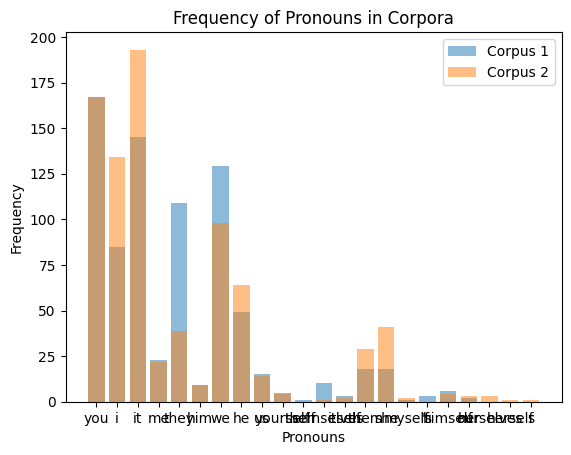

In [ ]:
# Read text from corpus files
with open('result_whatabout.txt', 'r', encoding='utf-8') as file:
    corpus1 = file.read()

with open('no_what_no_semeval.txt', 'r' , encoding='utf-8') as file:
    corpus2 = file.read()
# Tokenize text and count pronouns for corpus 1
tokens1 = word_tokenize(corpus1)
pronouns1 = [word.lower() for word, pos in nltk.pos_tag(tokens1) if pos == 'PRP']
pronoun_freq1 = nltk.FreqDist(pronouns1)

# Tokenize text and count pronouns for corpus 2
tokens2 = word_tokenize(corpus2)
pronouns2 = [word.lower() for word, pos in nltk.pos_tag(tokens2) if pos == 'PRP']
pronoun_freq2 = nltk.FreqDist(pronouns2)

# Plotting
plt.bar(pronoun_freq1.keys(), pronoun_freq1.values(), alpha=0.5, label='Corpus 1')
plt.bar(pronoun_freq2.keys(), pronoun_freq2.values(),  alpha=0.5, label='Corpus 2')
plt.xlabel('Pronouns')
plt.ylabel('Frequency')
plt.title('Frequency of Pronouns in Corpora')
plt.legend()
plt.show()



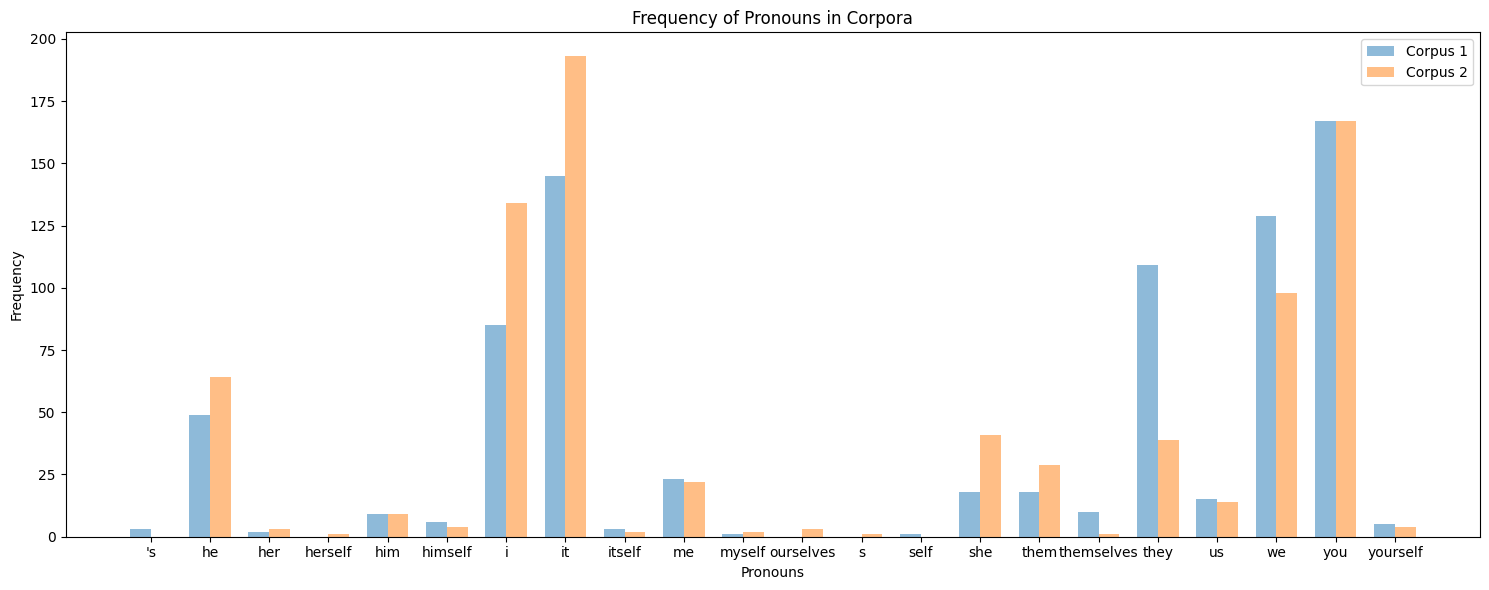

In [ ]:
import matplotlib.pyplot as plt
import nltk
from nltk.tokenize import word_tokenize

# Read text from corpus files
with open('result_whatabout.txt', 'r', encoding='utf-8') as file:
    corpus1 = file.read()

with open('no_what_no_semeval.txt', 'r', encoding='utf-8') as file:
    corpus2 = file.read()

# Tokenize text and count pronouns for corpus 1
tokens1 = word_tokenize(corpus1)
pronouns1 = [word.lower() for word, pos in nltk.pos_tag(tokens1) if pos == 'PRP']
pronoun_freq1 = nltk.FreqDist(pronouns1)

# Tokenize text and count pronouns for corpus 2
tokens2 = word_tokenize(corpus2)
pronouns2 = [word.lower() for word, pos in nltk.pos_tag(tokens2) if pos == 'PRP']
pronoun_freq2 = nltk.FreqDist(pronouns2)

# Get the list of unique pronouns
pronouns = sorted(set(list(pronoun_freq1.keys()) + list(pronoun_freq2.keys())))

# Set the width of the bars
bar_width = 0.35

# Set the index for the bars
index = range(len(pronouns))

# Plotting
plt.figure(figsize=(15, 6))
plt.bar(index, [pronoun_freq1.get(pronoun, 0) for pronoun in pronouns], bar_width, alpha=0.5, label='Corpus 1')
plt.bar([i + bar_width for i in index], [pronoun_freq2.get(pronoun, 0) for pronoun in pronouns], bar_width, alpha=0.5, label='Corpus 2')
plt.xlabel('Pronouns')
plt.ylabel('Frequency')
plt.title('Frequency of Pronouns in Corpora')
plt.xticks([i + bar_width / 2 for i in index], pronouns)  # Set x-axis labels at the center of each group
plt.legend()
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()


's - genitivo sassone possessivo emerso solo in corpus benaltrista
they, themselves, us e we maggiormente frequenti in corpus benaltrista (i dati potrebbero essere biased)

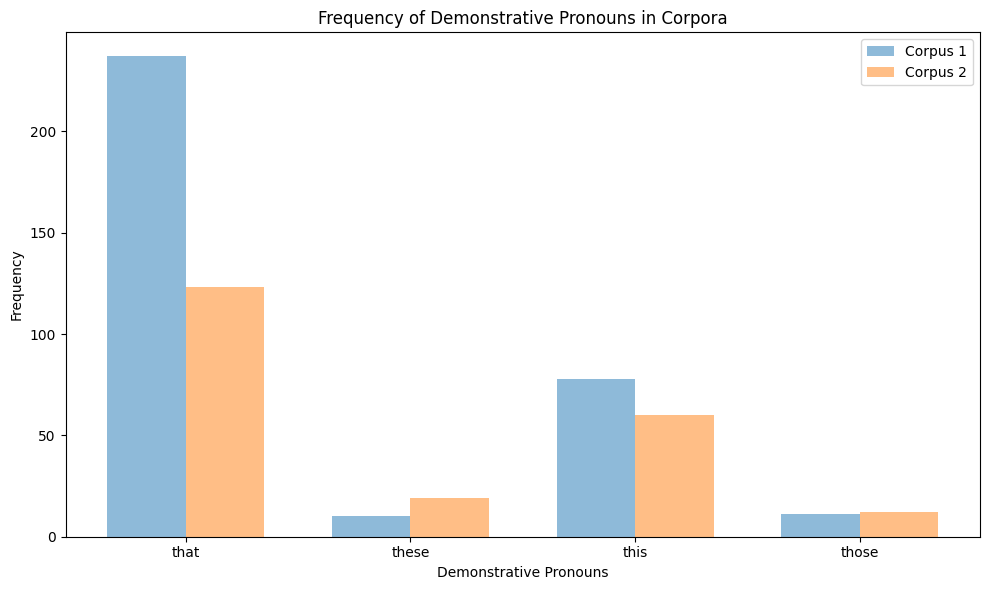

In [ ]:
import matplotlib.pyplot as plt
import nltk
from nltk.tokenize import word_tokenize

# Read text from corpus files
with open('result_whatabout.txt', 'r', encoding='utf-8') as file:
    corpus1 = file.read()

with open('no_what_no_semeval.txt', 'r', encoding='utf-8') as file:
    corpus2 = file.read()

# Tokenize text and count demonstrative pronouns for corpus 1
tokens1 = word_tokenize(corpus1)
demonstrative1 = ['this', 'that', 'these', 'those']  # List of demonstrative pronouns
demonstrative_freq1 = {word.lower(): tokens1.count(word.lower()) for word in demonstrative1}

# Tokenize text and count demonstrative pronouns for corpus 2
tokens2 = word_tokenize(corpus2)
demonstrative2 = ['this', 'that', 'these', 'those']  # List of demonstrative pronouns
demonstrative_freq2 = {word.lower(): tokens2.count(word.lower()) for word in demonstrative2}

# Get the list of unique demonstrative pronouns
demonstrative = sorted(set(list(demonstrative_freq1.keys()) + list(demonstrative_freq2.keys())))

# Set the width of the bars
bar_width = 0.35

# Set the index for the bars
index = range(len(demonstrative))

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(index, [demonstrative_freq1.get(word, 0) for word in demonstrative], bar_width, alpha=0.5, label='Corpus 1')
plt.bar([i + bar_width for i in index], [demonstrative_freq2.get(word, 0) for word in demonstrative], bar_width, alpha=0.5, label='Corpus 2')
plt.xlabel('Demonstrative Pronouns')
plt.ylabel('Frequency')
plt.title('Frequency of Demonstrative Pronouns in Corpora')
plt.xticks([i + bar_width / 2 for i in index], demonstrative)  # Set x-axis labels at the center of each group
plt.legend()
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()


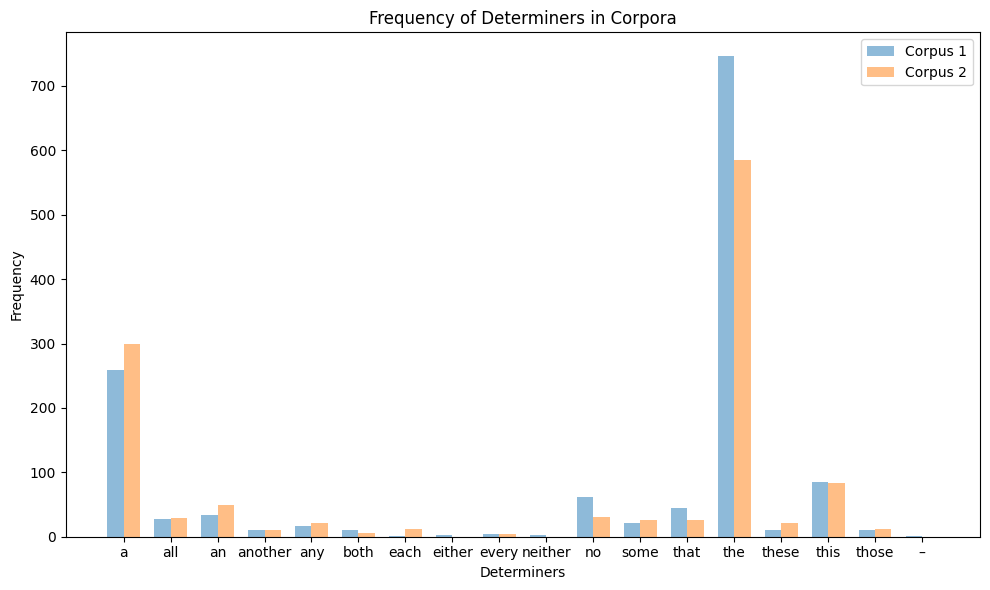

In [ ]:
import matplotlib.pyplot as plt
import nltk
from nltk.tokenize import word_tokenize

# Read text from corpus files
with open('result_whatabout.txt', 'r', encoding='utf-8') as file:
    corpus1 = file.read()

with open('no_what_no_semeval.txt', 'r', encoding='utf-8') as file:
    corpus2 = file.read()

# Tokenize text and count determiners for corpus 1
tokens1 = word_tokenize(corpus1)
tagged_tokens1 = nltk.pos_tag(tokens1)
determiners1 = [word.lower() for word, pos in tagged_tokens1 if pos.startswith('DT')]
determiner_freq1 = nltk.FreqDist(determiners1)

# Tokenize text and count determiners for corpus 2
tokens2 = word_tokenize(corpus2)
tagged_tokens2 = nltk.pos_tag(tokens2)
determiners2 = [word.lower() for word, pos in tagged_tokens2 if pos.startswith('DT')]
determiner_freq2 = nltk.FreqDist(determiners2)

# Get the list of unique determiners
determiners = sorted(set(list(determiner_freq1.keys()) + list(determiner_freq2.keys())))

# Set the width of the bars
bar_width = 0.35

# Set the index for the bars
index = range(len(determiners))

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(index, [determiner_freq1.get(word, 0) for word in determiners], bar_width, alpha=0.5, label='Corpus 1')
plt.bar([i + bar_width for i in index], [determiner_freq2.get(word, 0) for word in determiners], bar_width, alpha=0.5, label='Corpus 2')
plt.xlabel('Determiners')
plt.ylabel('Frequency')
plt.title('Frequency of Determiners in Corpora')
plt.xticks([i + bar_width / 2 for i in index], determiners)  # Set x-axis labels at the center of each group
plt.legend()
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()


In [4]:
#parquet to csv

import pandas as pd

# Read the Parquet file into a DataFrame
parquet_file = "C:\\Users\\lored\\OneDrive\\Desktop\\whatabout_research\\hugginfaceData\\test.parquet"
df = pd.read_parquet(parquet_file)

# Convert the DataFrame to CSV
csv_file = "C:\\Users\\lored\\OneDrive\\Desktop\\whatabout_research\\hugginfaceData\\test.csv"
df.to_csv(csv_file, index=False)


In [6]:
# Select rows where the label column has value 1
selected_rows = df[df['label'] == 1]
csvfile = "C:\\Users\\lored\\OneDrive\\Desktop\\whatabout_research\\hugginfaceData\\test_only_environment.csv"
selected_rows.to_csv(csvfile, index=False)

# Now selected_rows contains only the rows where the label is 1

In [7]:
#parquet to csv

import pandas as pd

# Read the Parquet file into a DataFrame
parquet_file_train = "C:\\Users\\lored\\OneDrive\\Desktop\\whatabout_research\\hugginfaceData\\train.parquet"
df = pd.read_parquet(parquet_file_train)

# Convert the DataFrame to CSV
csv_file_train = "C:\\Users\\lored\\OneDrive\\Desktop\\whatabout_research\\hugginfaceData\\train.csv"
df.to_csv(csv_file_train, index=False)


In [8]:
# Select rows where the label column has value 1
selected_rows_train = df[df['label'] == 1]
csvfiletrain = "C:\\Users\\lored\\OneDrive\\Desktop\\whatabout_research\\hugginfaceData\\train_only_environment.csv"
selected_rows_train.to_csv(csvfiletrain, index=False)

# Now selected_rows contains only the rows where the label is 1